In [1]:
import sys
sys.path.insert(0, '/Users/jisunan/myRepository/code-word2vec-application/analysis/05-alltogether/')
from groupcomparison_py3 import *

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [25]:
def find_similar_words(myembed, seedword, k=10):
    myvec = myembed[seedword]
    wordlist = [seedword]
    myresult = myembed.closest(seedword, n=2)
    word_next = myresult[1][1]
    yourvec = embed_A[word_next]
    wordlist.append(word_next)
    avg_vec = (myvec+yourvec)*0.5

    for i in range(0,k):
        myresult = myembed.closest_byvec(avg_vec, n=20)
        myvec = avg_vec
    #     print(i, myresult)
        for score, word in myresult:
            if word not in wordlist:
                yourvec = myembed[word]
                wordlist.append(word)
    #             print(word)
                avg_vec = (myvec+yourvec)*0.5
                break
    return wordlist

In [89]:
def pca_plot(embed_A, embed_B, set_A, set_B):
    
    myvecs = []
    for each_word in sorted(set_A):
        myvecs.append(myembed[each_word])
    pca = PCA(n_components=2)
    X_pca_A = pca.fit(myvecs).transform(myvecs)

    myvecs = []
    for each_word in sorted(set_B):
        myvecs.append(embed_B[each_word])
    pca_B = PCA(n_components=2)
    X_pca_B = pca_B.fit(myvecs).transform(myvecs)

    print('Hillary Clinton:', set_A)
    print('Donald Trump:', set_A)
    # # Percentage of variance explained for each components
    # print('explained variance ratio (first two components): %s'
    #       % str(pca.explained_variance_ratio_))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,7))
    fig.suptitle("%s" % (seedword.title()))
    ax1.scatter(X_pca_A[:, 0], X_pca_A[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_A)):
        ax1.annotate(txt, (X_pca_A[i, 0], X_pca_A[i, 1]))
        ax1.set_title("Hillary Clinton")
    ax2.scatter(X_pca_B[:, 0], X_pca_B[:, 1], alpha=0.2)
    for i, txt in enumerate(sorted(set_B)):
        ax2.annotate(txt, (X_pca_B[i, 0], X_pca_B[i, 1]))
        ax2.set_title("Donald Trump")
    # plt.title('PCA of dataset')
    plt.show()

In [30]:
seedword = "immigration"
print("Clinton", find_similar_words(embed_A, seedword, 20))
print("Trump", find_similar_words(embed_B, seedword, 20))

Clinton ['immigration', 'immigrants', 'undocumented', 'deporting', 'illegals', 'mexicans', 'rapists', 'murderers', 'criminals', 'dealers', 'cartels', 'addicts', 'gangs', 'heroin', 'drugs', 'drug', 'prescription', 'addiction', 'opioid', 'epidemic', 'hiv', 'aids']
Trump ['immigration', 'migration', 'emigration', 'importation', 'migrations', 'influx', 'inflow', 'influxes', 'outflow', 'deforestation', 'desertification', 'droughts', 'earthquakes', 'hurricanes', 'drought', 'floods', 'tsunamis', 'tornadoes', 'tornados', 'oceans', 'algae', 'methane']


In [35]:
name_base = "hillaryclinton"
name_other = "TheDonald"
base_path = "../05-alltogether/w2v_model/trained.%s.model.txt" % (name_base)
aligned_path = "../05-alltogether/w2v_model/aligned.%s_basedon_%s.model.txt" % (name_other, name_base)
isSgns = False
embed_A, embed_B = getEmbeds(base_path, aligned_path, isSgns)

Hillary Clinton: ['immigration', 'immigrants', 'undocumented', 'deporting', 'illegals', 'mexicans', 'rapists', 'murderers', 'criminals', 'dealers', 'cartels', 'addicts', 'gangs', 'heroin', 'drugs', 'drug', 'prescription', 'addiction', 'opioid', 'epidemic', 'hiv', 'aids']
Donald Trump: ['immigration', 'immigrants', 'undocumented', 'deporting', 'illegals', 'mexicans', 'rapists', 'murderers', 'criminals', 'dealers', 'cartels', 'addicts', 'gangs', 'heroin', 'drugs', 'drug', 'prescription', 'addiction', 'opioid', 'epidemic', 'hiv', 'aids']


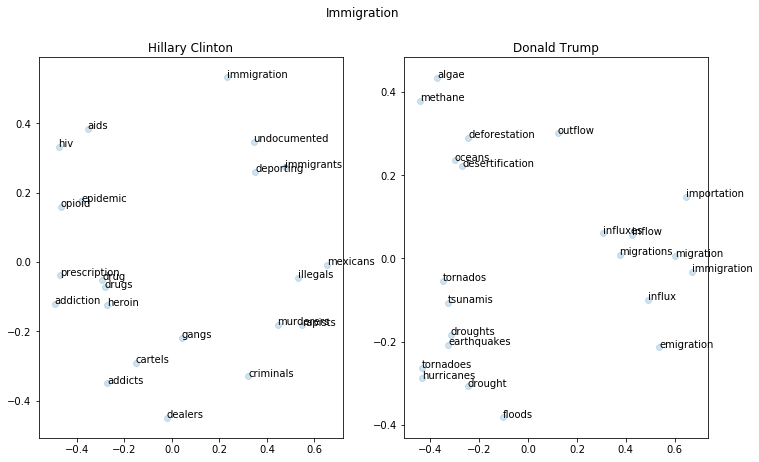

In [90]:
seedword = 'immigration'
set_A = (find_similar_words(embed_A, seedword, 20))
set_B = (find_similar_words(embed_B, seedword, 20))
pca_plot(embed_A, embed_B, set_A, set_B)

In [ ]:
myembed = embed_A
myvecs = []
for each_word in (set_A):
    myvecs.append(myembed[each_word])
pca = PCA(n_components=2)
X_pca = pca.fit(myvecs).transform(myvecs)
# # Percentage of variance explained for each components
# print('explained variance ratio (first two components): %s'
#       % str(pca.explained_variance_ratio_))
fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)

for i, txt in enumerate(set_A):
    ax.annotate(txt, (X_pca[i, 0], X_pca[i, 1]))
# plt.title('PCA of dataset')
plt.show()

Automatically created module for IPython interactive environment
explained variance ratio (first two components): [ 0.92461621  0.05301557]


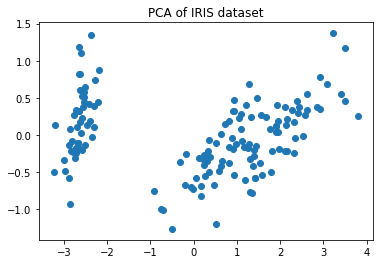

In [55]:
print(__doc__)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
# i = 0
# print(X_r[y == i, 0], X_r[y == i, 1])


# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

plt.figure()
plt.scatter(X_r[:, 0], X_r[:, 1])
# plt.scatter(X_r[,0], X_r[,1])

# colors = ['navy', 'turquoise', 'darkorange']
# lw = 2

# for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#     print(color, i, target_name)
#     plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#                 label=target_name)
# plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()

In [56]:
type(X)

numpy.ndarray